In [58]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import plots
from ConsumptionSavingModel import ConsumptionSavingModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Solving the buffer-stock consumption model

Consider the canonical buffer-stock consumption model:

Bellman equation in ratio form: 

$$\begin{align*}
v_{t}(m_{t}) & = \max_{c_{t}}\left\{ \frac{c_{t}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{t}\left[(G L_{t+1} \psi_{t+1})^{1-\rho}v_{t+1}(m_{t+1})\right]\right\} \\
 & \text{s.t.}\\
 a_t & =  m_t-c_t \\
m_{t+1} & =  \frac{1}{G L_t \psi_{t+1}}Ra_t+\xi_{t+1}\\ 
\psi_{t} & \sim  \exp \mathcal{N}(-0.5 \sigma^2_{\psi},\sigma^2_{\psi})\\
\xi_{t} & \sim  \exp \mathcal{N}(-0.5 \sigma^2_{\xi},\sigma^2_{\xi}) \\
\end{align*}$$

and remember
$$\begin{align*}
Y_{t+1}& = \psi_{t+1} P_{t+1} \\
P_{t+1}& = GL_tP_t\psi_{t+1}\\ 
c_t & \equiv C_t/P_t \\
m_t & \equiv M_t/P_t \\
a_t & \equiv A_t/P_t \\
p_t & \equiv P_t \\
y_t & \equiv Y_t \\
\end{align*}$$



### Run model

In [16]:
#Load baseline settings
model = ConsumptionSavingModelClass(do_print=True)

#Solve and simulate
model.precompile_numba()
model.solve()
model.simulate()

par = model.par
sol = model.sol
sim = model.sim

model simulated in 0.0 secs
model simulated in 8.1 secs


#### Plots

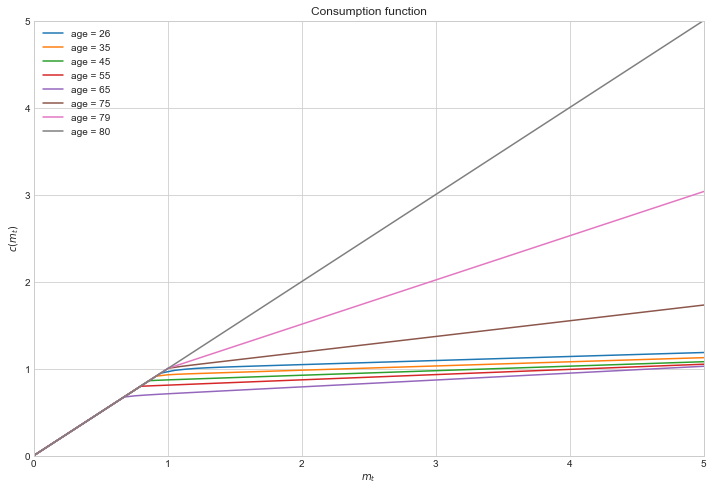

In [17]:
plots.plot_consumption(sol,par)

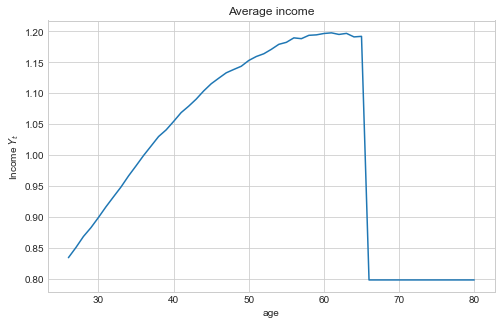

In [18]:
plots.plot_avg_income(sim,par)

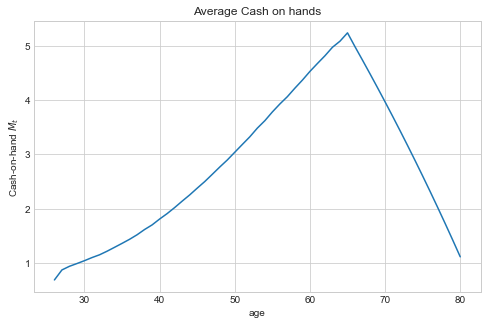

In [19]:
plots.plot_avg_cash_on_hand(sim,par)

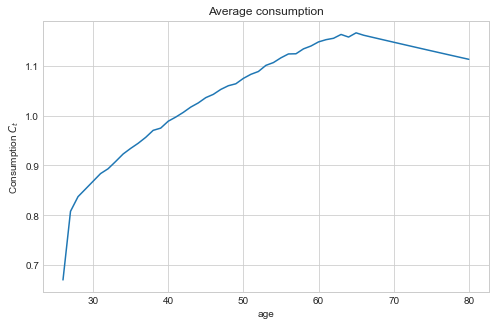

In [20]:
plots.plot_avg_consumption(sim,par)

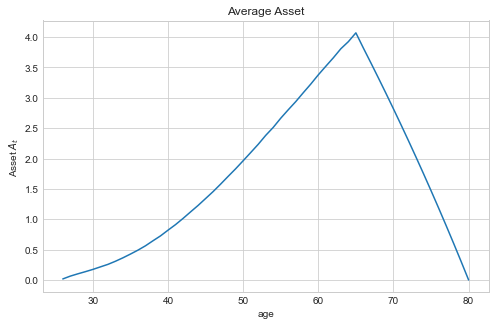

In [21]:
plots.plot_avg_assets(sim,par)

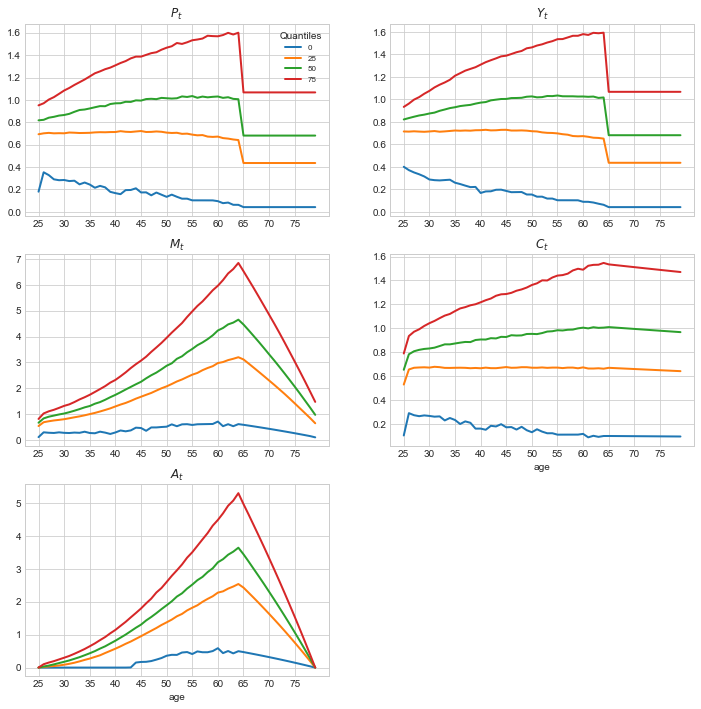

<Figure size 432x288 with 0 Axes>

In [64]:
plots.lifecycle(par,sim,deciles=True)

plt.savefig('output/lifecycle_oneasset.png')

### Computing MPCs

In [23]:
mean_mpc = np.mean(sim.mpc)*100
mean_mpc_working = np.mean(sim.mpc[:par.Tr-1,:])*100
mean_mpc_retirement = np.mean(sim.mpc[par.Tr:,:])*100

print(f'Mean annual MPC is {mean_mpc:.2f} pct.')
print(f'Mean annual MPC during work life is {mean_mpc_working:.2f} pct.')
print(f'Mean annual MPC during retirement is {mean_mpc_retirement:.2f} pct.')

Mean annual MPC is 13.91 pct.
Mean annual MPC during work life is 10.40 pct.
Mean annual MPC during retirement is 23.44 pct.


Life cycle MPC

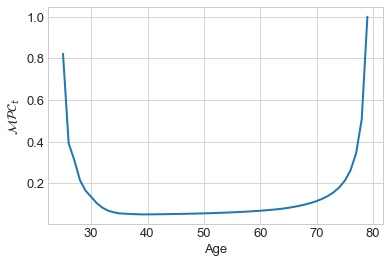

<Figure size 432x288 with 0 Axes>

In [65]:
# x-axis labels
age = np.arange(par.T)+par.Tmin

plt.plot(age,np.mean(sim.mpc,axis=1),lw=2)

#setting labels and fontsize
plt.xlabel('Age',fontsize=13)
plt.ylabel('$\mathcal{MPC}_{t}$',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

plt.savefig('output/mpc_lifecycle_oneasset.png')

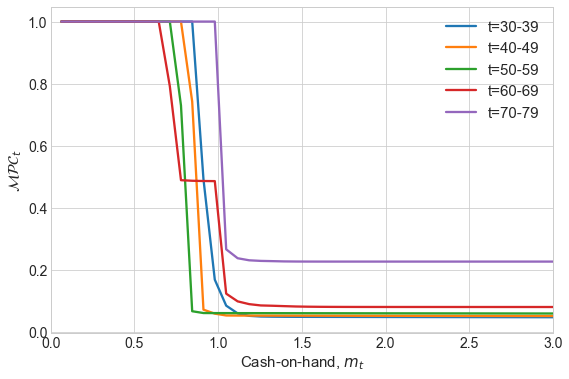

In [51]:
plots.mpc_over_cash_on_hand(par,sol,sim)

plt.savefig('output/mpc_over_wealth_oneasset.png')

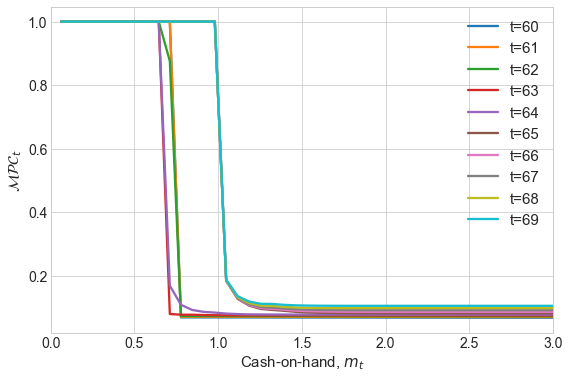

<Figure size 432x288 with 0 Axes>

In [66]:
plots.mpc_over_cash_on_hand_60(par,sol,sim)

plt.savefig('output/mpc_over_wealth_oneasset_60s.png')